Submission Proyek Akhir : Membuat Model Machine Learning dengan Data Time Series

---


Modul : Belajar Pengembangan Machine Learning

---


Nama / ID Dicoding : Endricho Abednego / M239X0468





In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, LSTM
import tensorflow as tf
from google.colab import files

In [2]:
dataset = files.upload()


Saving wind_dataset.csv to wind_dataset.csv


In [12]:
df = pd.read_csv('wind_dataset.csv')
df.head()
print(len(df))
df = df.drop(columns=['IND.1','T.MAX','IND.2','T.MIN','T.MIN.G'])

6574


In [15]:

df.head()

,DATE,WIND,IND,RAIN
0,1961-01-01,13.67,0,0.2
1,1961-01-02,11.50,0,5.1
2,1961-01-03,11.25,0,0.4
3,1961-01-04,8.63,0,0.2
4,1961-01-05,11.92,0,10.4


In [16]:
df.isnull().sum()

DATE    0
WIND    0
IND     0
RAIN    0
dtype: int64

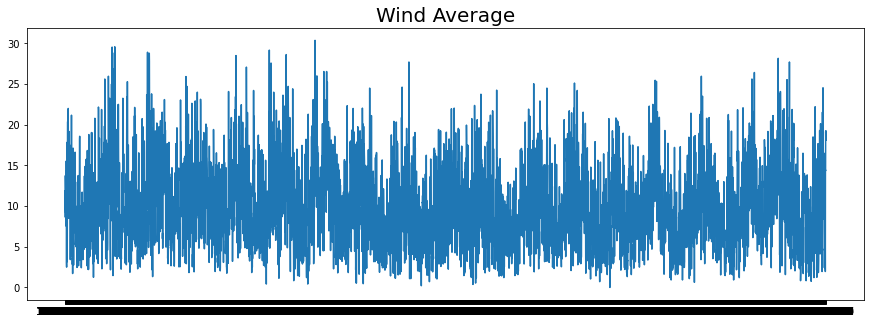

In [17]:
date = df['DATE'].values
wind = df['WIND'].values

plt.figure(figsize=(15,5))
plt.plot(date,wind)
plt.title('Wind Average',fontsize=20);

In [18]:
from sklearn.model_selection import train_test_split
date_train, date_val, wind_train, wind_val = train_test_split(date, wind, test_size=0.2, shuffle=False)

In [19]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1) 
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)


In [20]:
df.head()

,DATE,WIND,IND,RAIN
0,1961-01-01,13.67,0,0.2
1,1961-01-02,11.50,0,5.1
2,1961-01-03,11.25,0,0.4
3,1961-01-04,8.63,0,0.2
4,1961-01-05,11.92,0,10.4


In [21]:
train_set = windowed_dataset(wind_train, window_size=60, batch_size=100, shuffle_buffer=1000)
val_set = windowed_dataset(wind_val, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True,  input_shape=[None, 1]),
  tf.keras.layers.LSTM(30),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [22]:
thresh_Mae = (df['WIND'].max() - df['WIND'].min()*10/100)
print(thresh_Mae)

30.37


In [24]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.000e-04, momentum=0.9)
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=optimizer,
    metrics=['mae']
    )
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=100,
    verbose=2,
    )

Epoch 1/100
52/52 - 5s - loss: 8.9814 - mae: 9.4806 - val_loss: 8.9957 - val_mae: 9.4949 - 5s/epoch - 100ms/step
Epoch 2/100
52/52 - 1s - loss: 8.7986 - mae: 9.2974 - val_loss: 8.7967 - val_mae: 9.2949 - 1s/epoch - 24ms/step
Epoch 3/100
52/52 - 1s - loss: 8.5824 - mae: 9.0807 - val_loss: 8.5600 - val_mae: 9.0568 - 1s/epoch - 23ms/step
Epoch 4/100
52/52 - 1s - loss: 8.3201 - mae: 8.8176 - val_loss: 8.2694 - val_mae: 8.7641 - 1s/epoch - 23ms/step
Epoch 5/100
52/52 - 1s - loss: 7.9945 - mae: 8.4901 - val_loss: 7.9084 - val_mae: 8.4008 - 1s/epoch - 23ms/step
Epoch 6/100
52/52 - 1s - loss: 7.5888 - mae: 8.0826 - val_loss: 7.4595 - val_mae: 7.9496 - 1s/epoch - 24ms/step
Epoch 7/100
52/52 - 1s - loss: 7.0790 - mae: 7.5684 - val_loss: 6.8942 - val_mae: 7.3814 - 1s/epoch - 24ms/step
Epoch 8/100
52/52 - 1s - loss: 6.4412 - mae: 6.9256 - val_loss: 6.2047 - val_mae: 6.6899 - 1s/epoch - 24ms/step
Epoch 9/100
52/52 - 1s - loss: 5.7041 - mae: 6.1837 - val_loss: 5.4289 - val_mae: 5.9114 - 1s/epoch - 2

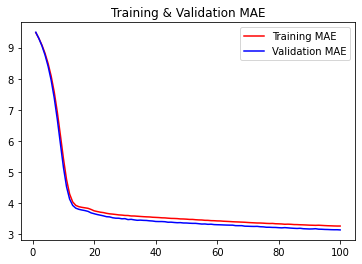

<Figure size 432x288 with 0 Axes>

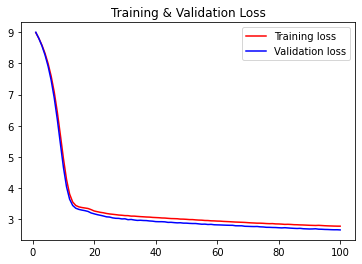

<Figure size 432x288 with 0 Axes>

In [29]:
train_mae = history.history['mae']
valid_mae = history.history['val_mae']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(train_mae) + 1)

plt.plot(epochs, train_mae, 'b',color='red', label='Training MAE')
plt.plot(epochs, valid_mae, 'b', label='Validation MAE')
plt.title('Training & Validation MAE')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b',color='red', label='Training loss')
plt.plot(epochs, valid_loss, 'b', label='Validation loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.figure()
plt.show()